# Chapter 09 텍스트를 위한 인공 신경망
- 텍스트와 시계열 데이터 같은 순차 데이터에 잘 맞는 순환 신경망의 개념과 구성 요소에 대해 배움
- 케라스 API로 기본적인 순환 신경망에서 고급 순환 신경망을 만들어 영화 감상평을 분류
- 순환 신경망에서 발생하는 문제점과 이를 극복하기 위한 해결책

## 9-2 순환 신경망으로 IMDB 리뷰 분류하기
- 텐서플로를 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류

### IMDB 리뷰 데이터셋
- Natural Language Processing (NLP)

In [1]:
from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=300)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [4]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [5]:
import numpy as np
lengths=np.array([len(x) for x in train_input])

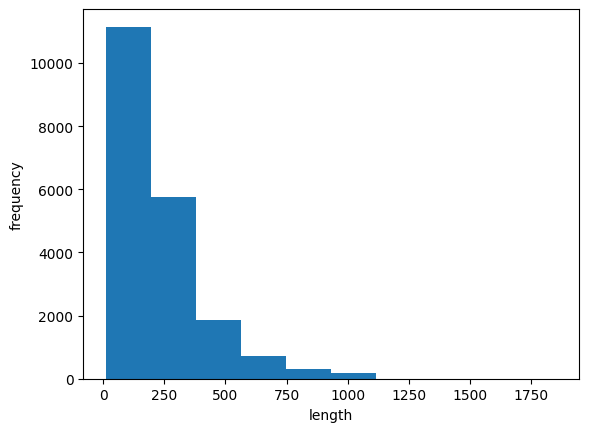

In [6]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input,maxlen=100)

In [9]:
val_seq=pad_sequences(val_input,maxlen=100)

### 순환 신경망 만들기

In [10]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,300)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [11]:
train_oh=keras.utils.to_categorical(train_seq)

In [12]:
val_oh=keras.utils.to_categorical(val_seq)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 순환 신경망 훈련하기

In [15]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model.fit(train_oh,train_target,epochs=100,batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 31s 81ms/step - loss: 0.6950 - accuracy: 0.5156 - val_loss: 0.6899 - val_accuracy: 0.5362
Epoch 2/100
  2/313 [..............................] - ETA: 19s - loss: 0.6844 - accuracy: 0.5391

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 24s 77ms/step - loss: 0.6833 - accuracy: 0.5573 - val_loss: 0.6758 - val_accuracy: 0.5838
Epoch 3/100
313/313 [==============================] - 27s 85ms/step - loss: 0.6627 - accuracy: 0.6084 - val_loss: 0.6538 - val_accuracy: 0.6212
Epoch 4/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6435 - accuracy: 0.6387 - val_loss: 0.6381 - val_accuracy: 0.6456
Epoch 5/100
313/313 [==============================] - 24s 75ms/step - loss: 0.6290 - accuracy: 0.6568 - val_loss: 0.6252 - val_accuracy: 0.6640
Epoch 6/100
313/313 [==============================] - 24s 75ms/step - loss: 0.6171 - accuracy: 0.6743 - val_loss: 0.6138 - val_accuracy: 0.6782
Epoch 7/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6056 - accuracy: 0.6896 - val_loss: 0.6065 - val_accuracy: 0.6910
Epoch 8/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5952 - accuracy: 0.7006 - val_loss: 0.5940 - val_accuracy: 0.70

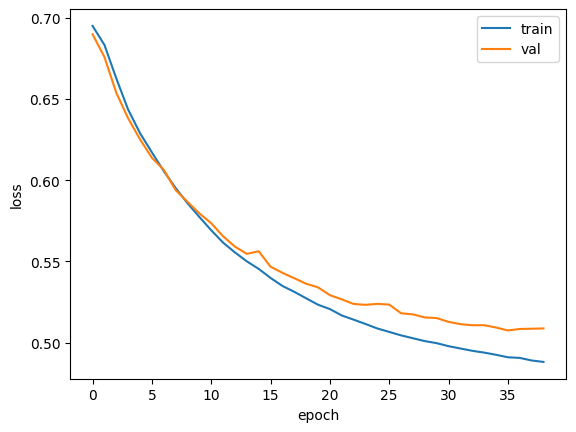

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 마무리
- `말뭉치` : 자연어 처리에서 사용하는 텍스트 데이터의 모음 = 훈련 데이터셋
- `토큰` : 텍스트에서 공백으로 구분되는 문자열.
- `원-핫 인코딩` : 어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터. 정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘 사전 크기의 벡터가 만들어짐
- `단어 임베딩` : 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환. 이런 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘